In [9]:
# %load my_imports.py
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
from glob import glob
import os

params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
          'axes.labelweight': 'bold',
         'axes.titlesize':'x-large',
          'axes.titleweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import matplotlib.pyplot as plt
# %pylab inline


In [2]:
from scipy.stats import lognorm, expon, norm
from random import random

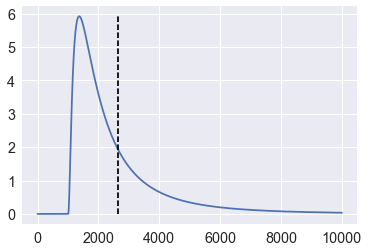

In [65]:
p_zero = 0.1

x = arange(0, 10000, 1)
y = zeros(x.shape)
y += 100 * expon.pdf(x, loc=0, scale=10)
y += lognorm.pdf(x, s=1, loc=1000, scale=1000) * (1 - p_zero) * 10000
plot(x, y)
mu = lognorm.moment(1, s=1, loc=1000, scale=1000)
plot([mu, mu], [0, y.max()], 'k--')

In [28]:
from scipy.stats import rv_continuous
class MyRVS(rv_continuous):
    def __init__(self, p_zero, loc=500, scale=1000, exp_scale=100, **kwargs):
        self._p_zero = p_zero
        self.loc = loc
        self.scale = scale
        self.zero_mul = 20
        self.exp_scale = exp_scale
        super(MyRVS, self).__init__(**kwargs)
        
    def _pdf(self, x):
        a = expon.pdf(x, loc=0, scale=self.exp_scale) * self.zero_mul
#         b = lognorm.pdf(x, s=1, loc=self.loc, scale=self.scale) * 10000
        b = norm.pdf(x, loc=self.loc, scale=self.scale) * 10000

        return self._p_zero * a + (1 - self._p_zero) * b
    
class MyRVS2(rv_continuous):
    def __init__(self, p_zero, loc=500, scale=1000, zero_scale=100, bias=0, **kwargs):
        self._p_zero = p_zero
        self.loc = loc
        self.scale = scale
        self.zero_mul = 20
        self.zero_scale = zero_scale
        self.bias = bias
        super(MyRVS2, self).__init__(**kwargs)
        
    def _pdf(self, x):
        a = norm.pdf(x, loc=0, scale=self.zero_scale) * self.zero_mul
#         b = lognorm.pdf(x, s=1, loc=self.loc, scale=self.scale) * 10000
        b = norm.pdf(x, loc=self.loc, scale=self.scale)

        return self._p_zero * a + (1 - self._p_zero) * b + self.bias
        

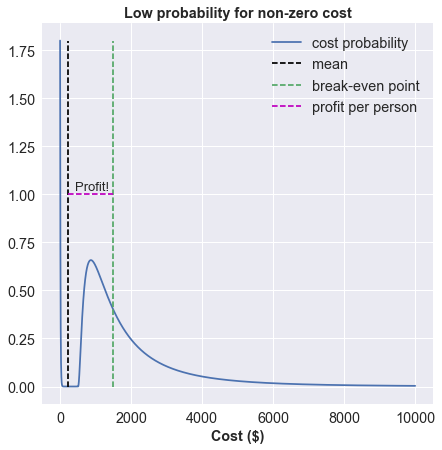

In [145]:
my_rvs = MyRVS(0.9)

x = arange(0, 10000, 1)
# mu = my_rvs.moment(1)
mu = lognorm.moment(1, s=1, loc=my_rvs.loc, scale=my_rvs.scale) * (1 - my_rvs._p_zero)

y = my_rvs.pdf(x)
figure(figsize=(7, 7))
plot(x, y, label='cost probability')
plot([mu, mu], [0, y.max()], 'k--', label='mean')
breakeven = 1500
plot([breakeven, breakeven], [0, y.max()], '--', label='break-even point')
plot([mu, breakeven], [1, 1], 'm--', label='profit per person')
text(0.85 * mu + 0.15 * breakeven, 1.02, 'Profit!', size=13)
title('Low probability for non-zero cost')
xlabel('Cost ($)')
legend()

In [135]:
text?

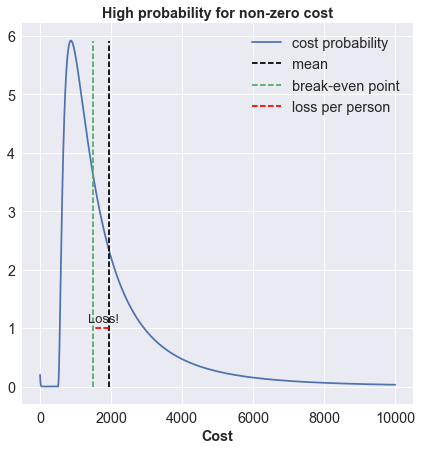

In [152]:
my_rvs = MyRVS(0.1, 500, 1000)
x = arange(0, 10000, 1)
# mu = my_rvs.moment(1)
mu = lognorm.moment(1, s=1, loc=my_rvs.loc, scale=my_rvs.scale) * (1 - my_rvs._p_zero)

y = my_rvs.pdf(x)
figure(figsize=(7, 7))
plot(x, y, label='cost probability')
plot([mu, mu], [0, y.max()], 'k--', label='mean')
plot([breakeven, breakeven], [0, y.max()], '--', label='break-even point')
plot([mu, breakeven], [1, 1], 'r--', label='loss per person')
text(0.90 * breakeven, 1.1, 'Loss!', size=13)
title('High probability for non-zero cost')
xlabel('Cost')
legend()

In [20]:
norm?

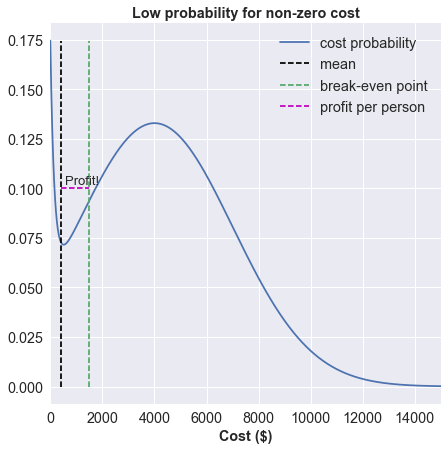

In [47]:
my_rvs = MyRVS(0.9, loc=4000, scale=3000, exp_scale=150)

x = arange(0, 15000, 1)
# mu = my_rvs.moment(1)
mu = norm.moment(1, loc=my_rvs.loc, scale=my_rvs.scale) * (1 - my_rvs._p_zero)

y = my_rvs.pdf(x)
figure(figsize=(7, 7))
plot(x, y, label='cost probability')
plot([mu, mu], [0, y.max()], 'k--', label='mean')
breakeven = 1500
plot([breakeven, breakeven], [0, y.max()], '--', label='break-even point')
plot([mu, breakeven], [0.1, 0.1], 'm--', label='profit per person')
text(0.85 * mu + 0.15 * breakeven, 0.102, 'Profit!', size=13)
title('Low probability for non-zero cost')
xlabel('Cost ($)')
xlim(0, 15000)
legend()

In [32]:
def foo(zero_weight, zero_scale, loc, scale, bias):
    x = np.arange(0, 15000, 1)
    my_rvs = MyRVS2(zero_weight, zero_scale=zero_scale, loc=loc, scale=scale, bias=bias)

    # mu = my_rvs.moment(1)
    # mu = norm.moment(1, loc=my_rvs.loc, scale=my_rvs.scale) * (1 - my_rvs._p_zero)

    y = my_rvs.pdf(x)
    plt.figure(figsize=(7, 7))
    plt.plot(x, y, label='high risk')
    # plot([mu, mu], [0, y.max()], 'k--', label='mean')
    # breakeven = 1500
    # plot([breakeven, breakeven], [0, y.max()], '--', label='break-even point')
    # plot([mu, breakeven], [0.1, 0.1], 'm--', label='profit per person')
    # text(0.85 * mu + 0.15 * breakeven, 0.102, 'Profit!', size=13)
    plt.title('Cost distribution')
    plt.xlabel('Cost ($)')
    plt.ylabel('Density')
    plt.xlim(0, 15000)
    plt.ylim(0, y.max() * 1.01)
    plt.legend()
    plt.show()

#     my_rvs = MyRVS2(0.0009, loc=4000, scale=3000, zero_scale=500)
#     y = my_rvs.pdf(x)
#     plot(x, y, '--', label='low risk')

In [33]:
from ipywidgets import interact, FloatSlider, IntSlider

In [38]:
interact(foo,
        zero_weight=FloatSlider(min=0, max=0.2, value=0.03, step=0.0001),
        zero_scale=IntSlider(min=10, max=10000, step=10, value=800),
        loc=IntSlider(min=0, max=10000, step=100, value=4000),
        scale=IntSlider(min=10, max=10000, step=10, value=2000),
        bias=FloatSlider(min=0, max=0.0001, step=0.00001, value=0.00003))

<function __main__.foo>

In [1]:
import pacal

Using compiled interpolation routine
Using compiled sparse grid routine


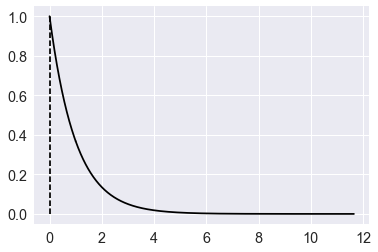

In [15]:
k = pacal.ExponentialDistr(1)
k.plot()